<a href="https://colab.research.google.com/github/saiachanta2728/ML-LABS/blob/main/ML_Lab13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bayesian Network**

A Bayesian Network (also known as a Bayesian Belief Network or a Probabilistic Graphical Model) is a graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). Bayesian networks are widely used in machine learning for various applications, including reasoning, decision-making, and prediction.


**Key Concepts of Bayesian Networks**

**Nodes and Edges:**

**Nodes:** Represent random variables, which can be discrete or continuous.

**Edges:** Directed edges (arrows) indicate the relationships between the nodes, where an edge from node A to node B suggests that A has a direct influence on B.

**Conditional Probability Distribution (CPD):**

Each node has an associated CPD that quantifies the effect of the parent nodes on that node. If a node has no parents, it has a prior probability distribution.

**Directed Acyclic Graph (DAG):**

The structure of a Bayesian network is a directed acyclic graph, meaning there are no cycles or loops. This ensures a clear direction of influence among the variables.

**Inference**:

Bayesian networks enable reasoning about the relationships between variables. Inference involves computing the probability distribution of a subset of variables given evidence about other variables. Common inference algorithms include Variable Elimination and Belief Propagation.

**Learning:**

Bayesian networks can be learned from data.

There are two main types oflearning:
**Parameter Learning:** Estimating the CPDs given a structure.
**Structure Learning: **Identifying the network structure from data.

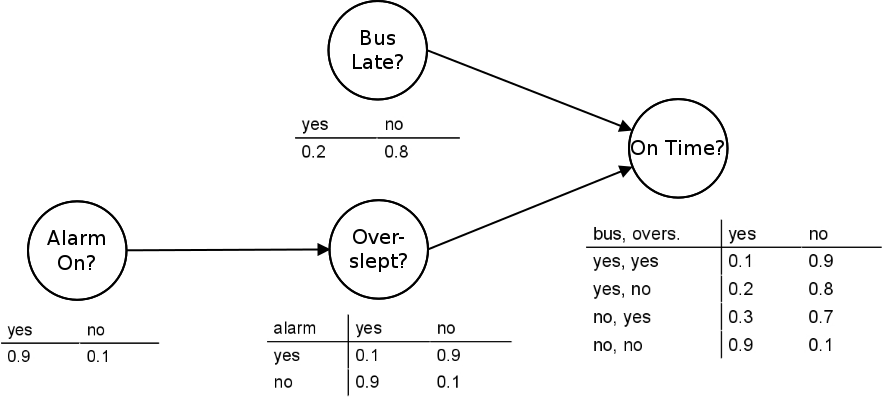

### **13. Write a Python program to construct a Bayesian network considering medical data. Use this model to demonstrate the diagnosis of heart patients using standard Heart Disease Data Set**

In [4]:
!pip install pgmpy




In [5]:
import numpy as np
import pandas as pd
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

# Read Cleveland Heart Disease data
heartDisease = pd.read_csv('/content/Lab13.csv')
heartDisease = heartDisease.replace('?', np.nan)

# Display the data
print('Few examples from the dataset are given below:')
print(heartDisease.head())

# Display the Attributes names and datatypes
print('\nAttributes and datatypes:')
print(heartDisease.dtypes)

# Check the unique values in the 'restecg' column
print('\nUnique values in restecg:')
unique_restecg_values = heartDisease['restecg'].unique()
print(unique_restecg_values)  # Print unique values



Few examples from the dataset are given below:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   41    0   2       130   204    0        2      172      0      1.4      1   
4   62    0   4       140   268    0        2      160      0      3.6      3   

   ca  thal  Heartdisease  
0   0     6             0  
1   3     3             2  
2   2     7             1  
3   0     3             0  
4   2     3             3  

Attributes and datatypes:
age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca     

In [6]:
# Create Model - Bayesian Network
model = BayesianModel([
    ('age', 'Heartdisease'),
    ('sex', 'Heartdisease'),
    ('exang', 'Heartdisease'),
    ('cp', 'Heartdisease'),
    ('Heartdisease', 'restecg'),
    ('Heartdisease', 'chol')
])

# Learning CPDs using Maximum Likelihood Estimators
print('\nLearning CPD using Maximum Likelihood Estimators:')
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)

# Inferencing with Bayesian Network
print('\nInferencing with Bayesian Network:')
HeartDiseasetest_infer = VariableElimination(model)

# Use valid value from unique values of restecg
# Here, you can replace 1 with a valid value from unique_restecg_values
# Ensure that the value you use is one of the valid states
# For example, if unique_restecg_values outputs [0, 1, 2], you can use any of those as valid evidence.
if len(unique_restecg_values) > 0:
    valid_restecg_value = unique_restecg_values[0]  # Change this if needed based on your dataset
    print(f'\n1. Probability of HeartDisease given evidence= restecg: {valid_restecg_value}')
    q1 = HeartDiseasetest_infer.query(variables=['Heartdisease'], evidence={'restecg': valid_restecg_value})
    print(q1)
else:
    print("No unique values found for restecg.")

# Computing the Probability of HeartDisease given cp
print('\n2. Probability of HeartDisease given evidence= cp: 2')
q2 = HeartDiseasetest_infer.query(variables=['Heartdisease'], evidence={'cp': 2})
print(q2)



Learning CPD using Maximum Likelihood Estimators:

Inferencing with Bayesian Network:

1. Probability of HeartDisease given evidence= restecg: 2
+-----------------+---------------------+
| Heartdisease    |   phi(Heartdisease) |
+=================+=====================+
| Heartdisease(0) |              0.1852 |
+-----------------+---------------------+
| Heartdisease(1) |              0.2083 |
+-----------------+---------------------+
| Heartdisease(2) |              0.2083 |
+-----------------+---------------------+
| Heartdisease(3) |              0.1898 |
+-----------------+---------------------+
| Heartdisease(4) |              0.2083 |
+-----------------+---------------------+

2. Probability of HeartDisease given evidence= cp: 2
+-----------------+---------------------+
| Heartdisease    |   phi(Heartdisease) |
+=================+=====================+
| Heartdisease(0) |              0.2222 |
+-----------------+---------------------+
| Heartdisease(1) |              0.1944 |
+-